In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
import seaborn as sns

In [2]:
uni = pd.read_csv("PCA.csv")
print(uni.describe())
uni.head()

               SAT       Top10     Accept   SFRatio      Expenses   GradRate
count    25.000000   25.000000  25.000000  25.00000     25.000000  25.000000
mean   1266.440000   76.480000  39.200000  12.72000  27388.000000  86.720000
std     108.359771   19.433905  19.727308   4.06735  14424.883165   9.057778
min    1005.000000   28.000000  14.000000   6.00000   8704.000000  67.000000
25%    1240.000000   74.000000  24.000000  11.00000  15140.000000  81.000000
50%    1285.000000   81.000000  36.000000  12.00000  27553.000000  90.000000
75%    1340.000000   90.000000  50.000000  14.00000  34870.000000  94.000000
max    1415.000000  100.000000  90.000000  25.00000  63575.000000  97.000000


,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
uni.drop('Univ',axis = 1)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [4]:
uni.shape

(25, 7)

C:\Users\Iftekar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SFRatio', ylabel='Density'>

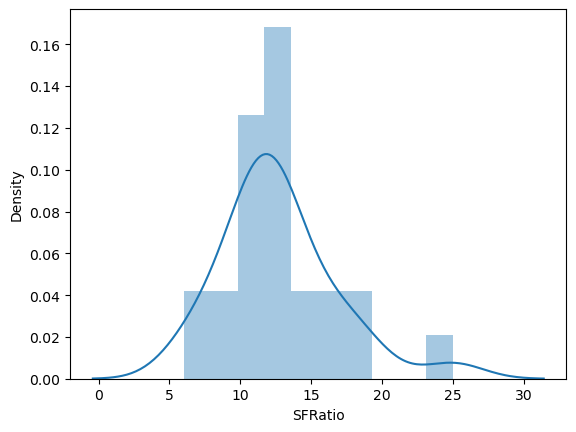

In [3]:
sns.distplot(uni.SFRatio)

In [6]:
# Considering only numerical data
universities = uni.Univ 
uni = uni.iloc[:,1:]
display(uni.head())
# Converting into numpy array
UNI = uni.values
UNI

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


array([[ 1310,    89,    22,    13, 22704,    94],
       [ 1415,   100,    25,     6, 63575,    81],
       [ 1260,    62,    59,     9, 25026,    72],
       [ 1310,    76,    24,    12, 31510,    88],
       [ 1280,    83,    33,    13, 21864,    90],
       [ 1340,    89,    23,    10, 32162,    95],
       [ 1315,    90,    30,    12, 31585,    95],
       [ 1255,    74,    24,    12, 20126,    92],
       [ 1400,    91,    14,    11, 39525,    97],
       [ 1305,    75,    44,     7, 58691,    87],
       [ 1380,    94,    30,    10, 34870,    91],
       [ 1260,    85,    39,    11, 28052,    89],
       [ 1255,    81,    42,    13, 15122,    94],
       [ 1081,    38,    54,    18, 10185,    80],
       [ 1375,    91,    14,     8, 30220,    95],
       [ 1005,    28,    90,    19,  9066,    69],
       [ 1360,    90,    20,    12, 36450,    93],
       [ 1075,    49,    67,    25,  8704,    67],
       [ 1240,    95,    40,    17, 15140,    78],
       [ 1290,    75,    50,   

In [5]:
universities

0            Brown
1          CalTech
2              CMU
3         Columbia
4          Cornell
5        Dartmouth
6             Duke
7       Georgetown
8          Harvard
9     JohnsHopkins
10             MIT
11    Northwestern
12       NotreDame
13       PennState
14       Princeton
15          Purdue
16        Stanford
17        TexasA&M
18      UCBerkeley
19        UChicago
20       UMichigan
21           UPenn
22             UVA
23      UWisconsin
24            Yale
Name: Univ, dtype: object

In [6]:
uni

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [10]:
scale(uni,axis = 0)

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
StandardScaler().fit_transform(uni)

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [11]:
# Normalizing the numerical data 
uni_normal = scale(UNI)

In [11]:
uni_normal

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [ ]:
#PCA()fit_transform(scale(UNI))

In [16]:
pca1 = PCA()

In [17]:
pca1.fit_transform(uni_normal)

array([[-1.00987445e+00, -1.06430962e+00,  8.10663051e-02,
         5.69506350e-02, -1.28754245e-01, -3.46496377e-02],
       [-2.82223781e+00,  2.25904458e+00,  8.36828830e-01,
         1.43844644e-01, -1.25961913e-01, -1.80703168e-01],
       [ 1.11246577e+00,  1.63120889e+00, -2.66786839e-01,
         1.07507502e+00, -1.91814148e-01,  3.45679459e-01],
       [-7.41741217e-01, -4.21874699e-02,  6.05008649e-02,
        -1.57208116e-01, -5.77611392e-01,  1.09163092e-01],
       [-3.11912064e-01, -6.35243572e-01,  1.02405189e-02,
         1.71363672e-01,  1.27261287e-02, -1.69212696e-02],
       [-1.69669089e+00, -3.44363283e-01, -2.53407507e-01,
         1.25643278e-02, -5.26606002e-02, -2.71661600e-02],
       [-1.24682093e+00, -4.90983662e-01, -3.20938196e-02,
        -2.05643780e-01,  2.93505340e-01, -7.80119838e-02],
       [-3.38749784e-01, -7.85168589e-01, -4.93584829e-01,
         3.98563085e-02, -5.44978619e-01, -1.55371653e-01],
       [-2.37415013e+00, -3.86538883e-01,  1.160

In [24]:
pca = PCA(n_components=2)
pca_values = pca.fit_transform(uni_normal)

In [25]:
pca_values

array([[-1.00987445, -1.06430962],
       [-2.82223781,  2.25904458],
       [ 1.11246577,  1.63120889],
       [-0.74174122, -0.04218747],
       [-0.31191206, -0.63524357],
       [-1.69669089, -0.34436328],
       [-1.24682093, -0.49098366],
       [-0.33874978, -0.78516859],
       [-2.37415013, -0.38653888],
       [-1.40327739,  2.11951503],
       [-1.72610332,  0.08823712],
       [-0.45085748, -0.01113295],
       [ 0.04023814, -1.00920438],
       [ 3.23373034, -0.37458049],
       [-2.23626502, -0.37179329],
       [ 5.17299212,  0.77991535],
       [-1.69964377, -0.30559745],
       [ 4.578146  , -0.34759136],
       [ 0.82260312, -0.69890615],
       [-0.09776213,  0.65044645],
       [ 1.9631826 , -0.22476756],
       [-0.54228894, -0.07958884],
       [ 0.53222092, -1.0171672 ],
       [ 3.54869664,  0.77846167],
       [-2.30590032, -0.11770432]])

In [14]:
pca.components_

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367]])

In [18]:
pca1.components_

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [ 0.13124033,  0.37489567,  0.0612872 , -0.50739095, -0.62340055,
        -0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

In [19]:
# The amount of variance that each PCA explains is 
var = pca1.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

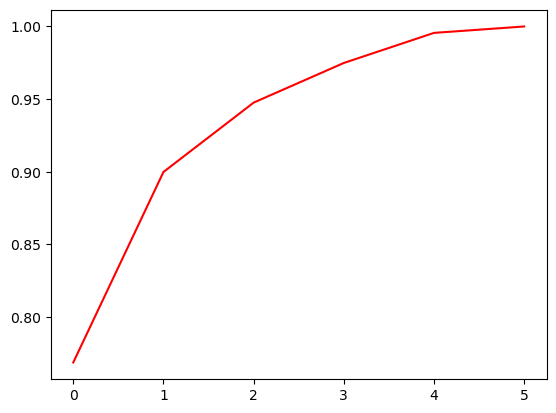

In [23]:
plt.plot(np.cumsum(var),color = 'red')

In [28]:
pca.explained_variance_

array([4.80425527, 0.81960016])

In [29]:
pca1.explained_variance_

array([4.80425527, 0.81960016, 0.29850193, 0.17060428, 0.12948562,
       0.02755274])

In [25]:
var2 = pca1.explained_variance_ratio_
var2

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [31]:
var3 = np.cumsum(np.round(var2,decimals = 4)*100)
var3

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

In [15]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([76.87, 89.98])

In [ ]:
PCA1 = -0.45*sat - 0.427*top + 0.42*accep ...

In [12]:
pca.components_

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367]])

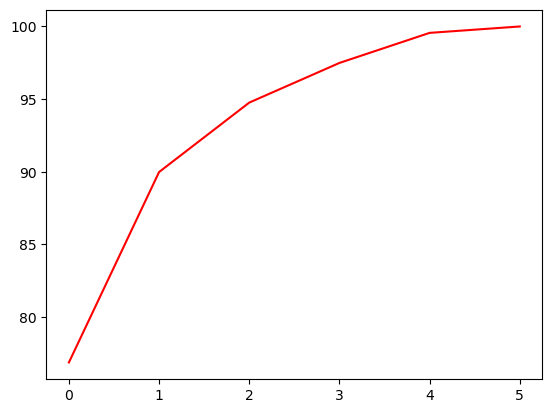

In [22]:
# Variance plot for PCA components obtained 
plt.plot(var3,color="red")

In [18]:
 pca_values[:,0:1]

array([[-1.00987445],
       [-2.82223781],
       [ 1.11246577],
       [-0.74174122],
       [-0.31191206],
       [-1.69669089],
       [-1.24682093],
       [-0.33874978],
       [-2.37415013],
       [-1.40327739],
       [-1.72610332],
       [-0.45085748],
       [ 0.04023814],
       [ 3.23373034],
       [-2.23626502],
       [ 5.17299212],
       [-1.69964377],
       [ 4.578146  ],
       [ 0.82260312],
       [-0.09776213],
       [ 1.9631826 ],
       [-0.54228894],
       [ 0.53222092],
       [ 3.54869664],
       [-2.30590032]])

In [30]:
pca_values[:,1]

array([-1.06430962,  2.25904458,  1.63120889, -0.04218747, -0.63524357,
       -0.34436328, -0.49098366, -0.78516859, -0.38653888,  2.11951503,
        0.08823712, -0.01113295, -1.00920438, -0.37458049, -0.37179329,
        0.77991535, -0.30559745, -0.34759136, -0.69890615,  0.65044645,
       -0.22476756, -0.07958884, -1.0171672 ,  0.77846167, -0.11770432])

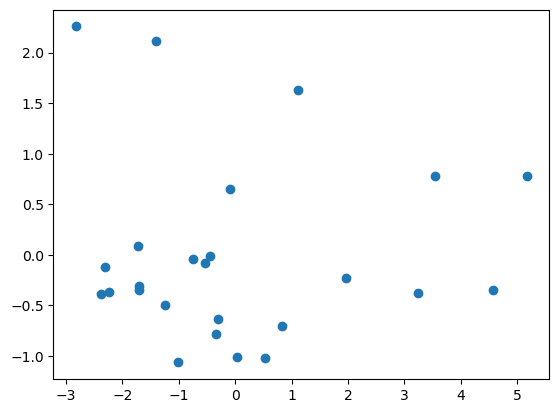

In [31]:
plt.scatter(pca_values[:,0],pca_values[:,1])

C:\Users\Iftekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

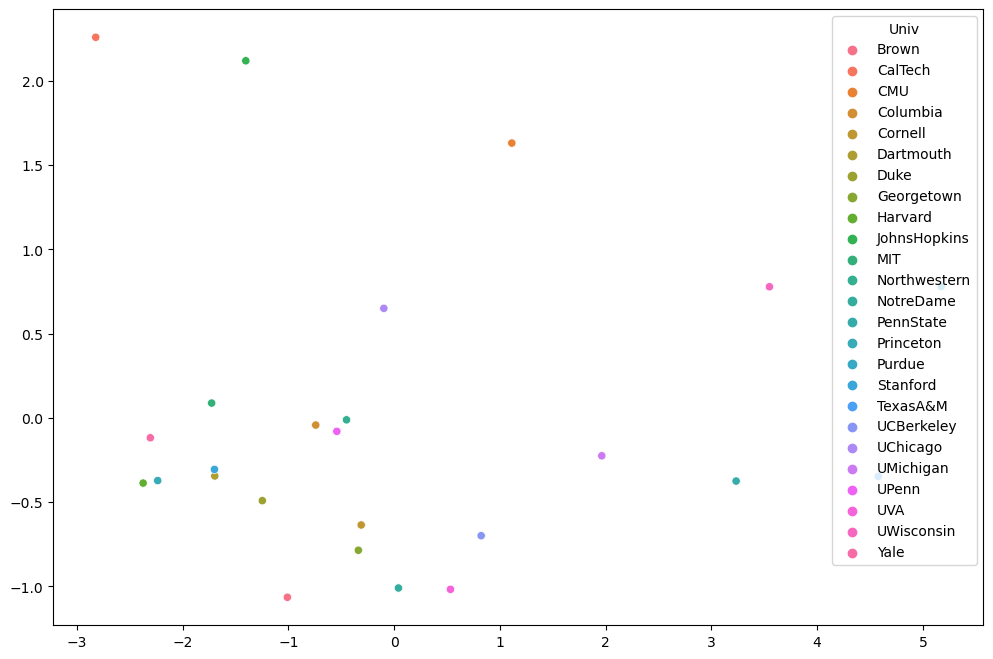

In [43]:
plt.figure(figsize = (12,8))
sns.scatterplot(pca_values[:,0],pca_values[:,1],hue = uni['Univ'])

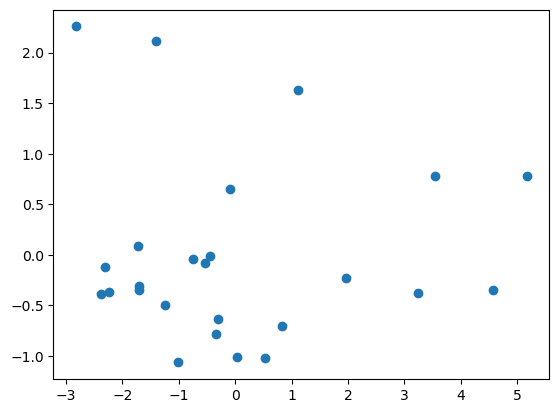

In [23]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [43]:
df = pd.DataFrame(pca_values[:,0:2],columns=['pc1_score','pc2_score'],index = uni['Univ'])

In [45]:
df.index

Index(['Brown', 'CalTech', 'CMU', 'Columbia', 'Cornell', 'Dartmouth', 'Duke',
       'Georgetown', 'Harvard', 'JohnsHopkins', 'MIT', 'Northwestern',
       'NotreDame', 'PennState', 'Princeton', 'Purdue', 'Stanford', 'TexasA&M',
       'UCBerkeley', 'UChicago', 'UMichigan', 'UPenn', 'UVA', 'UWisconsin',
       'Yale'],
      dtype='object', name='Univ')

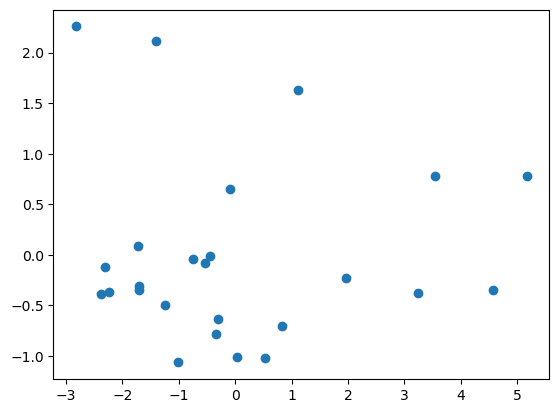

In [44]:
plt.scatter(df.pc1_score,df.pc2_score)

C:\Users\Iftekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pc1_score', ylabel='pc2_score'>

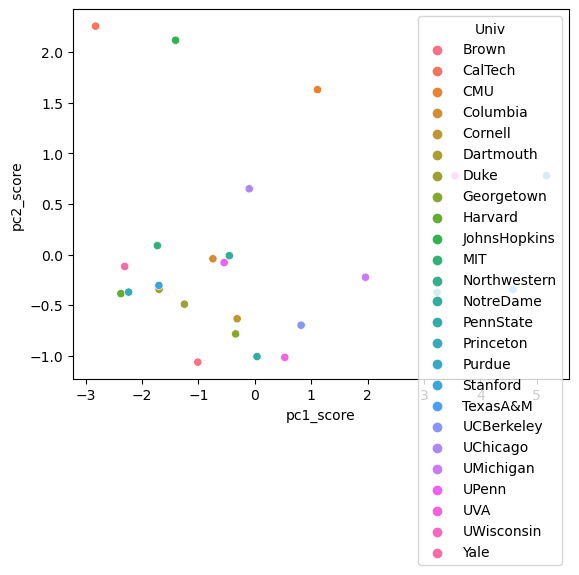

In [47]:
sns.scatterplot(df.pc1_score,df.pc2_score,hue = df.index)

In [24]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), universities], axis = 1)

In [25]:
finalDf

,pc1,pc2,Univ
0,-1.009874,-1.064310,Brown
1,-2.822238,2.259045,CalTech
2,1.112466,1.631209,CMU
3,-0.741741,-0.042187,Columbia
4,-0.311912,-0.635244,Cornell
5,-1.696691,-0.344363,Dartmouth
6,-1.246821,-0.490984,Duke
7,-0.338750,-0.785169,Georgetown
8,-2.374150,-0.386539,Harvard
9,-1.403277,2.119515,JohnsHopkins


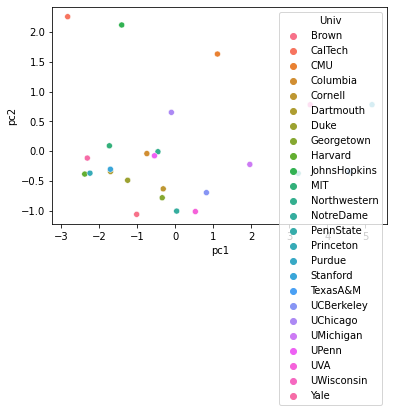

In [28]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Univ')